# California Housing dataset


Dataset Features:
- MedInc
- HouseAge
- AveRooms
- AveBedrms
- Population
- AveOccup
- Latitude
- Longitude



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Print feature information
print("Dataset Features:")
for name in housing.feature_names:
    print(f"- {name}")
print("\nTarget: Median house value in $100,000s")

Dataset Features:
- MedInc
- HouseAge
- AveRooms
- AveBedrms
- Population
- AveOccup
- Latitude
- Longitude

Target: Median house value in $100,000s


In [ ]:
# Get the dimentions of the dataset.
X.shape

(20640, 8)

In [ ]:
# Get the column names of the dataset
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
# Get the data types of the different features/ columns
X.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64


In [ ]:
# Compute a summary of statistics pertaining to the DataFrame columns
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [ ]:
# to check the missing or null values in the data set
X.isnull().sum()
miss_val = X.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=X.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/X.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent


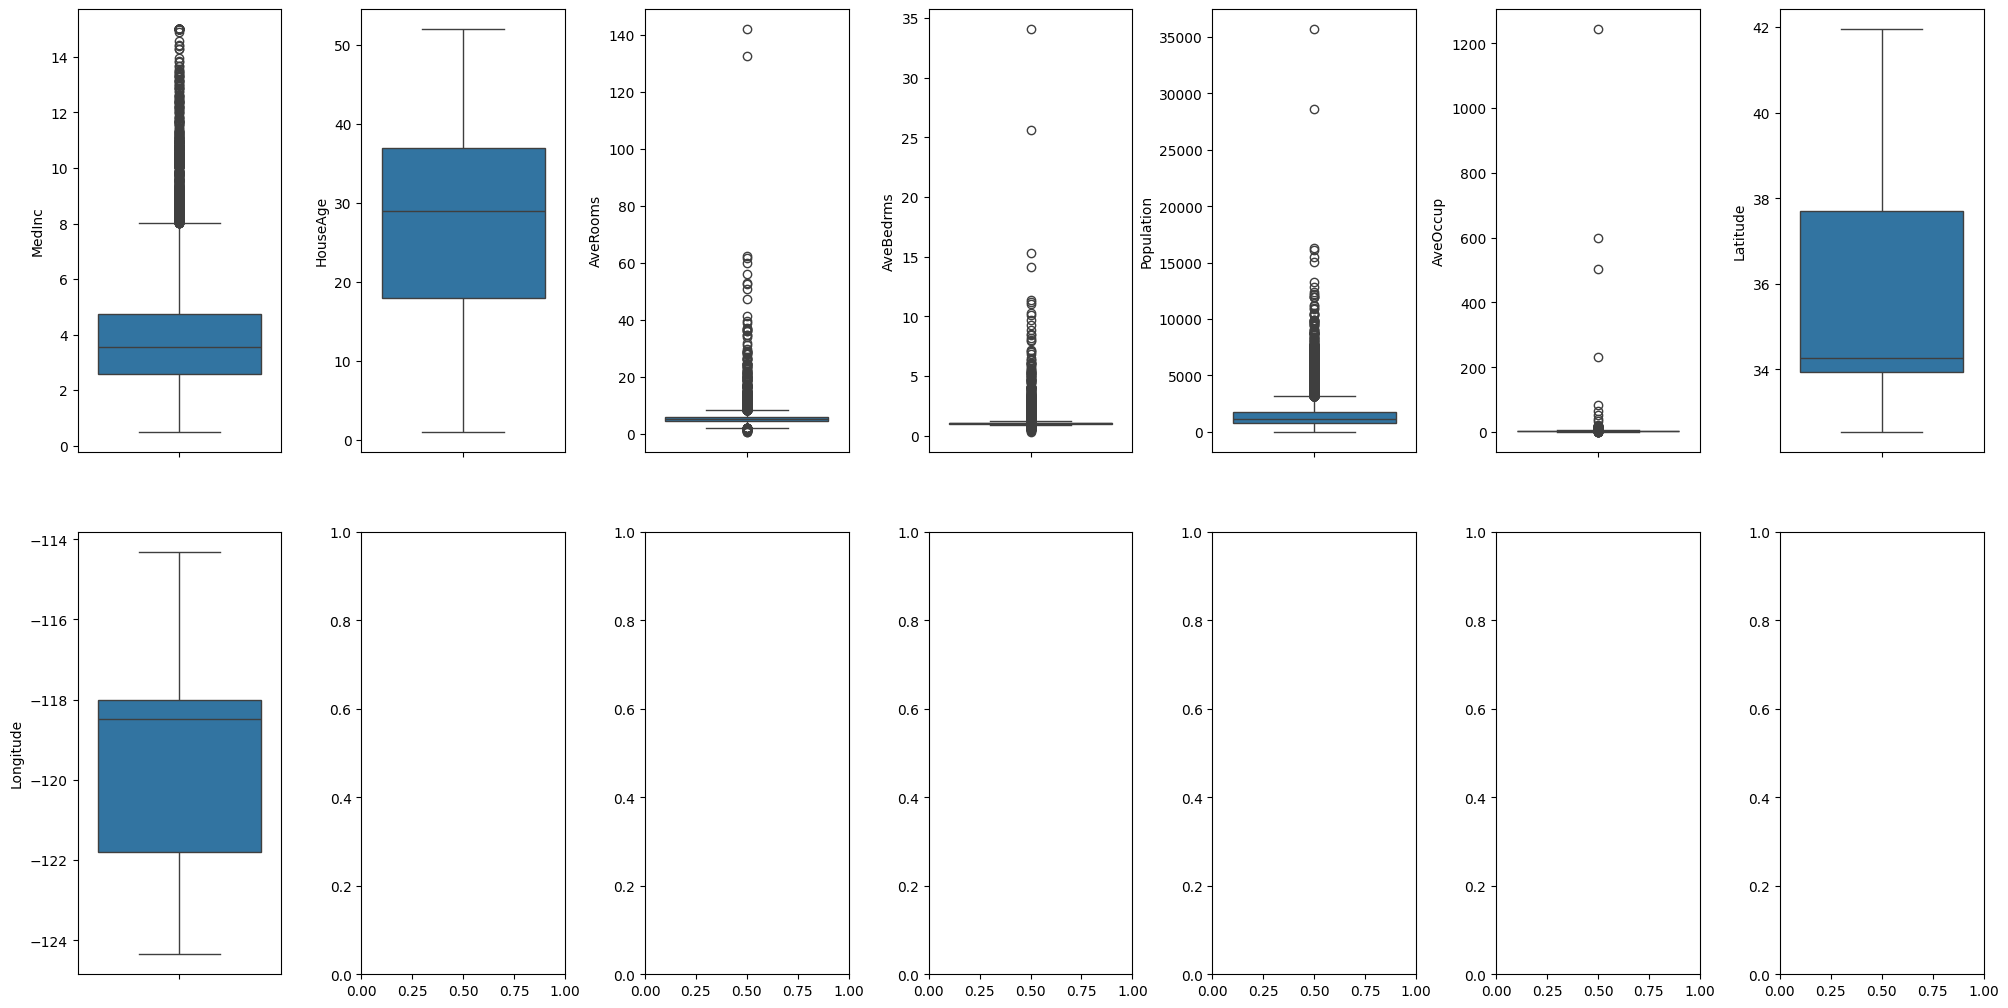

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.boxplot(y=k, data=X, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
import numpy as np # Import the numpy library and alias it as 'np'

for k, v in X.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(X)[0] # Now 'np' is recognized
    print("Column %s outliers = %.2f%%" % (k, perc))


Column MedInc outliers = 3.30%
Column HouseAge outliers = 0.00%
Column AveRooms outliers = 2.48%
Column AveBedrms outliers = 6.90%
Column Population outliers = 5.80%
Column AveOccup outliers = 3.44%
Column Latitude outliers = 0.00%
Column Longitude outliers = 0.00%


# HeatMap Visualization
a heatmap visualization showing the strength of relationships between all numerical features in the dataset. The heatmap uses color to represent the correlation strength

<Axes: >

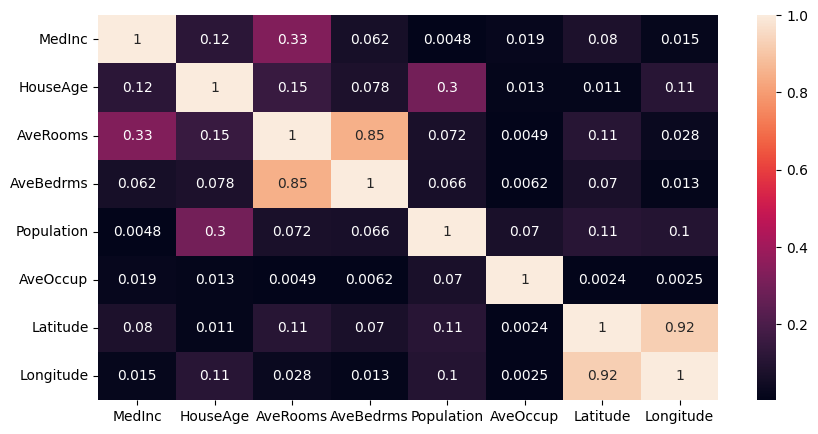

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(X.corr().abs(),  annot=True)


Training the model...
Iteration 100/1000, Loss: 1.3176
Iteration 200/1000, Loss: 0.7141
Iteration 300/1000, Loss: 0.6195
Iteration 400/1000, Loss: 0.5956
Iteration 500/1000, Loss: 0.5830
Iteration 600/1000, Loss: 0.5733
Iteration 700/1000, Loss: 0.5653
Iteration 800/1000, Loss: 0.5585
Iteration 900/1000, Loss: 0.5527
Iteration 1000/1000, Loss: 0.5477


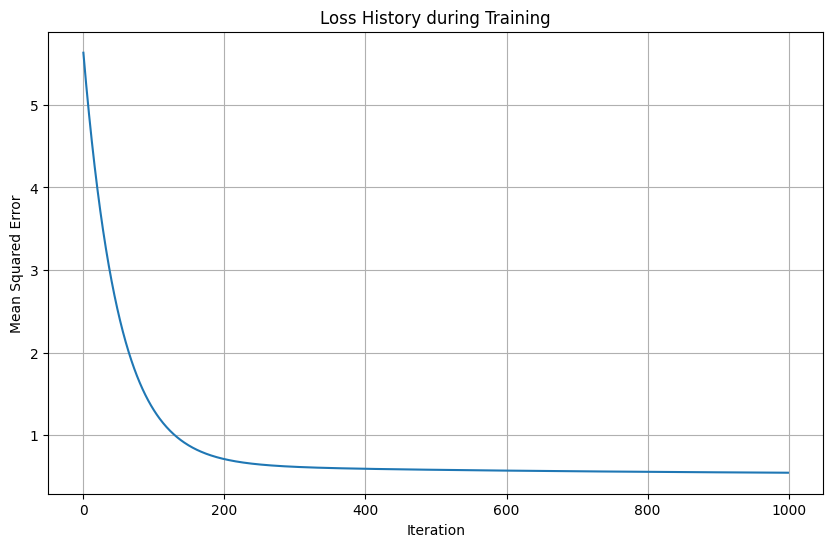

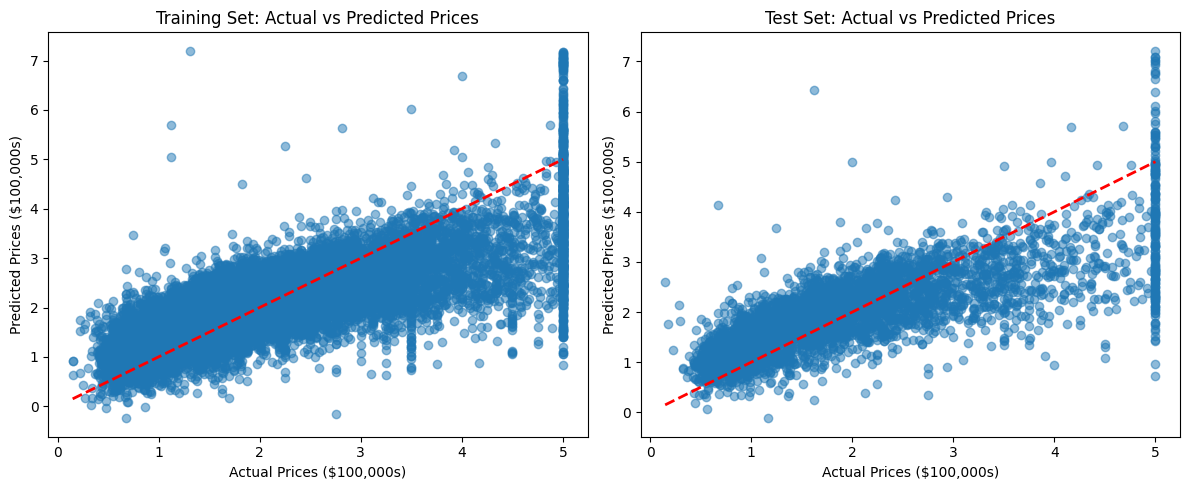


Model Performance Metrics:
Training MSE: 0.5477
Test MSE: 0.5672
Training R² Score: 0.5903
Test R² Score: 0.5672

Example Prediction:
Predicted Price: $88,074.77
Actual Price: $47,700.00

Feature Importance:
MedInc: 0.8289
Latitude: 0.4871
Longitude: 0.4515
HouseAge: 0.1785
AveBedrms: 0.1567
AveRooms: 0.1379
AveOccup: 0.0452
Population: 0.0168


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.n_iterations):
            # Linear model
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and store loss
            loss = mean_squared_error(y, y_predicted)
            self.loss_history.append(loss)

            # Print progress every 100 iterations
            if (i + 1) % 100 == 0:
                print(f'Iteration {i + 1}/{self.n_iterations}, Loss: {loss:.4f}')

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train the model
print("\nTraining the model...")
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Plot loss history
plt.figure(figsize=(10, 6))
plt.plot(model.loss_history)
plt.title('Loss History during Training')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Prices ($100,000s)')
plt.ylabel('Predicted Prices ($100,000s)')
plt.title('Training Set: Actual vs Predicted Prices')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices ($100,000s)')
plt.ylabel('Predicted Prices ($100,000s)')
plt.title('Test Set: Actual vs Predicted Prices')

plt.tight_layout()
plt.show()

# Print metrics
print("\nModel Performance Metrics:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

# Function to predict house prices
def predict_house_price(features):
    # Scale the features using the same scaler
    features_scaled = scaler.transform(features)
    # Make prediction
    prediction = model.predict(features_scaled)
    return prediction * 100000  # Convert back to dollars

# Example: Predict price for a new house
sample_house = X_test[:1]  # Take first house from test set as example
predicted_price = predict_house_price(sample_house)
actual_price = y_test[0] * 100000  # Using array indexing instead of iloc

print("\nExample Prediction:")
print(f"Predicted Price: ${predicted_price[0]:,.2f}")
print(f"Actual Price: ${actual_price:,.2f}")

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Importance': np.abs(model.weights)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
for idx, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the dataset to get feature names and their ranges
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)

# Create input sliders with appropriate ranges for each feature
def predict_price(*inputs):
    # Convert inputs to numpy array and reshape for single prediction
    features = np.array(inputs).reshape(1, -1)

    # Scale the features
    features_scaled = scaler.transform(features)

    # Make prediction
    prediction = model.predict(features_scaled)

    # Convert prediction to dollars
    price = prediction[0] * 100000

    return f"${price:,.2f}"

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(minimum=float(X['MedInc'].min()), maximum=float(X['MedInc'].max()),
                 label="Median Income (tens of thousands)"),
        gr.Slider(minimum=float(X['HouseAge'].min()), maximum=float(X['HouseAge'].max()),
                 label="House Age (years)"),
        gr.Slider(minimum=float(X['AveRooms'].min()), maximum=float(X['AveRooms'].max()),
                 label="Average Rooms"),
        gr.Slider(minimum=float(X['AveBedrms'].min()), maximum=float(X['AveBedrms'].max()),
                 label="Average Bedrooms"),
        gr.Slider(minimum=float(X['Population'].min()), maximum=float(X['Population'].max()),
                 label="Population"),
        gr.Slider(minimum=float(X['AveOccup'].min()), maximum=float(X['AveOccup'].max()),
                 label="Average Occupancy"),
        gr.Slider(minimum=float(X['Latitude'].min()), maximum=float(X['Latitude'].max()),
                 label="Latitude"),
        gr.Slider(minimum=float(X['Longitude'].min()), maximum=float(X['Longitude'].max()),
                 label="Longitude")
    ],
    outputs="text",
    title="California House Price Predictor",
    description="Enter house features to predict the price. All values should be in the same units as the training data.",
    examples=[
        [8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23],  # Example house
        [3.1917, 32.0, 4.857143, 1.081081, 1201.0, 2.128571, 34.26, -118.43]  # Another example
    ]
)

# Launch the interface
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bedeebcd1865b551d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
